In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dataset=pd.read_csv("breastCancer_processed.csv")
dataset.head()

,numara,yigin_kalinligi,hucre_boyutu_esbicim,hucre_sekil_esbicim,marjinal_yapisma,tek_epitel_hucre_boyut,ciplak_cekirdekler,yumusak_kromatin,normal_nukleoli,mitoz,sinif
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [2]:
x = dataset.drop(["sinif","numara"],axis=1).values
y = dataset["sinif"].values

classifier= DecisionTreeClassifier()

In [3]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=4, random_state=5)
k_fold_scores=[]

sc = StandardScaler()

for train_index, test_index in rkf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    classifier.fit(X_train, y_train)

    accuracy = classifier.score(X_test, y_test)
    y_pred = classifier.predict(X_test)
    cm_nb = confusion_matrix(y_test, y_pred)

    print(classification_report(y_test,y_pred))

    k_fold_scores.append(accuracy)

print("Ortalama dogruluk:", sum(k_fold_scores) / len(k_fold_scores))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.96      0.91      0.93        47

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        90
           1       0.87      0.87      0.87        47

    accuracy                           0.91       137
   macro avg       0.90      0.90      0.90       137
weighted avg       0.91      0.91      0.91       137

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        91
           1       0.98      0.87      0.92        46

    accuracy                           0.95       137
   macro avg       0.96      0.93      0.94       137
weighted avg       0.95      0.95      0.95       137

              preci

model 1 AUC score: 0.9096024006001501


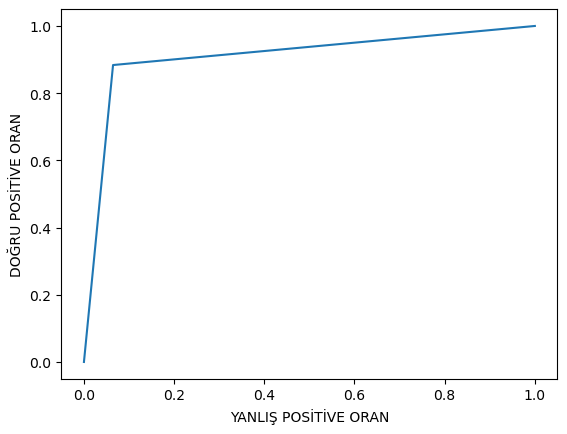

In [4]:
def plot_roc_curve(true_y, y_prob):
    """
    ROC eğrisini olasılıklara dayalı olarak çizer.
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('YANLIŞ POSİTİVE ORAN')
    plt.ylabel('DOĞRU POSİTİVE ORAN') 

plot_roc_curve(y_test, y_pred)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred)}')